In [45]:
import pandas as pd
import numpy as np

In [22]:
df= pd.read_csv("/Users/intesurahmed/Downloads/pubmed_abstracts.csv")


# Drop first column of dataframe using pop()
df.pop(df.columns[0])
print(df)




                                           deep_learning  \
0      (['Magnetic resonance spectroscopic imaging (M...   
1      (['Existing deep convolutional neural networks...   
2      (['Deep learning techniques have been increasi...   
3      (['The original article unfortunately containe...   
4      (['The most common applications of artificial ...   
...                                                  ...   
13195  (["Intact function of the Forkhead Box P2 (FOX...   
13196  (["Studies on ADHD in educational settings ind...   
13197  (['The mechanisms underlying cerebellar learni...   
13198  (['Withania somnifera root extract has been us...   
13199  (['Deep brain stimulation (DBS) has been found...   

                                                covid_19  \
0      (['As cancer researchers shutter their labs to...   
1      (['In December 2019, the outbreak of pneumonia...   
2            ([], 'Treating COVID-19 with Chloroquine.')   
3      (['18 years ago, in 2002, the wo

In [68]:
article2=df.covid_19.values[:250]

In [69]:
len(article2)

250

In [70]:
article1=df.deep_learning.values[:250]

In [71]:
len(article1)

250

In [72]:
article3=df.human_connectome.values[:250]

In [73]:
len(article3)

250

In [74]:
article4=df.virtual_reality.values[:250]

In [75]:
type(article4)

numpy.ndarray

In [76]:
article=np.concatenate((article1,article2,article3,article4), axis=0)
article

array(["(['Magnetic resonance spectroscopic imaging (MRSI) is a powerful molecular imaging modality but has very limited speed, resolution, and SNR tradeoffs. Construction of a low-dimensional model to effectively reduce the dimensionality of the imaging problem has recently shown great promise in improving these tradeoffs. This paper presents a new approach to model and reconstruct the spectroscopic signals by learning a nonlinear low-dimensional representation of the general MR spectra. Specifically, we trained a deep neural network to capture the low-dimensional manifold, where the high-dimensional spectroscopic signals reside. A regularization formulation is proposed to effectively integrate the learned model and physics-based data acquisition model for MRSI reconstruction with the capability to incorporate additional spatiospectral constraints. An efficient numerical algorithm was developed to solve the associated optimization problem involving back-propagating the trained network

In [77]:
main_data= article

In [78]:
import collections

Community Detection

In [79]:
art = []
for i in article:
    if(len(str(i))>0):
        art.append(str(i))
article = art
len(article)

1000

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

import re
from gensim.parsing.preprocessing import remove_stopwords

from nltk.corpus import wordnet

In [81]:
pos = ["FW", "NN", "NNS", "NNP", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

In [82]:
wn = nltk.WordNetLemmatizer()

In [83]:
def unique(s):
    unique_list = []
    for x in s:
        if x not in unique_list:
            check = x.isnumeric()
            if(check):
                unique_list.append("num")
            else:
                unique_list.append(x)
            
    return unique_list

In [84]:
def preprocess(art):
    articles = []
    for l in art:
        l = str(l)
        if(len(l)>300):
            txt = l
            tokenized = sent_tokenize(txt)
            t = []
            for i in tokenized:
                wordsList = nltk.word_tokenize(i)
                wordsList = [w for w in wordsList if not w in stop_words]
                tagged = nltk.pos_tag(wordsList)
                for i in tagged:
                    t.append(i)
            s = ""
            for i in t:
                if(i[1] in pos):
                    s=s+" "+i[0]
            article = s
            article = article.lower()
            article = re.sub(r'[^\w\s]','',article)
            article = remove_stopwords(article)
            words_article = word_tokenize(article)
            wa = []
            for i in words_article:
                a = wn.lemmatize(i)
                wa.append(a)
            
            s = unique(wa)
            articles.append(s)
            
            
    return articles

In [85]:
topic_sen = preprocess(article)

In [86]:
topic_sen

[['resonance',
  'spectroscopic',
  'imaging',
  'mrsi',
  'modality',
  'limited',
  'speed',
  'resolution',
  'snr',
  'tradeoff',
  'construction',
  'model',
  'reduce',
  'dimensionality',
  'problem',
  'shown',
  'promise',
  'improving',
  'paper',
  'present',
  'approach',
  'reconstruct',
  'signal',
  'learning',
  'representation',
  'mr',
  'spectrum',
  'trained',
  'network',
  'capture',
  'manifold',
  'reside',
  'regularization',
  'formulation',
  'proposed',
  'learned',
  'data',
  'acquisition',
  'reconstruction',
  'capability',
  'incorporate',
  'constraint',
  'algorithm',
  'developed',
  'associated',
  'optimization',
  'involving',
  'backpropagating',
  'simulation',
  'result',
  'obtained',
  'power',
  'ability',
  'producing',
  'constrained',
  'nonlinear'],
 ['existing',
  'network',
  'cnns',
  'success',
  'image',
  'deraining',
  'expense',
  'number',
  'parameter',
  'limit',
  'application',
  'device',
  'paper',
  'lightweight',
  'pyra

In [87]:
article

["(['Magnetic resonance spectroscopic imaging (MRSI) is a powerful molecular imaging modality but has very limited speed, resolution, and SNR tradeoffs. Construction of a low-dimensional model to effectively reduce the dimensionality of the imaging problem has recently shown great promise in improving these tradeoffs. This paper presents a new approach to model and reconstruct the spectroscopic signals by learning a nonlinear low-dimensional representation of the general MR spectra. Specifically, we trained a deep neural network to capture the low-dimensional manifold, where the high-dimensional spectroscopic signals reside. A regularization formulation is proposed to effectively integrate the learned model and physics-based data acquisition model for MRSI reconstruction with the capability to incorporate additional spatiospectral constraints. An efficient numerical algorithm was developed to solve the associated optimization problem involving back-propagating the trained network. Simu

In [88]:
counts = {}
for i in topic_sen:
    for j in i:
        if j in counts:
            counts[j] +=1
        else:
            counts[j] = 1

In [89]:
new_data = []
for i in topic_sen:
    art=[]
    for j in i:
        if(counts[j]>1):
            art.append(j)
    new_data.append(art)

In [90]:
c = 0
for i in new_data:
    c = c + len(i)
c

39148

In [91]:
replace = {}
w = []
for i in new_data:
    for word in i:
        synonyms = []
        for syn in wordnet.synsets(word):
            for i in syn.lemmas():
                synonyms.append(i.name())
        if(len(set(synonyms))==0):
            replace[word] = word
            w.append(word)
        else:
            for i in synonyms:
                if i not in w:
                    replace[i] = word
                    w.append(word)

In [92]:
final_topic_sen = []
for i in new_data:
    a = []
    for j in i:
        if(j in replace):
            a.append(replace[j])
        else:
            a.append(j)
    final_topic_sen.append(a)

In [93]:
c = 0
for i in final_topic_sen:
    c = c + len(i)
    
c

39148

In [94]:
import math
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=2)

In [96]:
documents = []
for i in final_topic_sen:
    s = ""
    for j in i:
        s = s+" "+j
    documents.append(s)

In [97]:
len(documents)

842

In [98]:
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [99]:
len(tfidf_vectorizer.get_feature_names())


/Users/intesurahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3387

In [100]:
valid = tfidf_vectorizer.get_feature_names()

In [101]:
final = []
for i in final_topic_sen:
    s = []
    for j in i:
        if j in valid:
            s.append(j)
    if(len(s)>0):
        final.append(s)

In [102]:
len(final)

842

In [103]:
dt = []
for i in final:
    s = ""
    for j in i:
        s = s+j+" "
    dt.append(s)

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')

X = cv.fit_transform(dt)
Xc = (X.T * X)
Xc.setdiag(0)

In [105]:
names = cv.get_feature_names()
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

In [106]:
import numpy as np

In [107]:
matrix = df.where(np.triu(np.ones(df.shape)).astype(np.bool))
matrix

/var/folders/6f/f1d7t8ds66q5225tvtl8vhd00000gn/T/ipykernel_22636/1718618950.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = df.where(np.triu(np.ones(df.shape)).astype(np.bool))


,aa,ability,abnormality,absence,absent,absolute,abstraction,abundance,acc,accelerated,...,yielding,yolov3,young,zone,zu,zur,über,ε4,方法,结论
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
ability,NaN,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
abnormality,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
absence,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
absent,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0
über,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0
ε4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
方法,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2


In [108]:
matrix = matrix.stack().reset_index()
matrix.columns = ['Row','Column','Value']
matrix

,Row,Column,Value
0,aa,aa,0.0
1,aa,ability,0.0
2,aa,abnormality,0.0
3,aa,absence,0.0
4,aa,absent,0.0
...,...,...,...
5690246,ε4,方法,0.0
5690247,ε4,结论,0.0
5690248,方法,方法,0.0
5690249,方法,结论,2.0


In [109]:
edge = matrix[matrix["Value"] != 0]
edge

,Row,Column,Value
8,aa,acc,2.0
112,aa,allele,1.0
129,aa,amygdala,1.0
217,aa,aspect,1.0
244,aa,attention,1.0
...,...,...,...
5690170,year,ε4,1.0
5690231,zu,zur,1.0
5690232,zu,über,1.0
5690237,zur,über,1.0


In [110]:
node1 = edge.Row.values
node2 = edge.Column.values
value = edge.Value.values

In [111]:
value = 1/value

In [112]:
import networkx as nx
import matplotlib.pyplot as plt
# from networkx.algorithms.community import k_clique_communities
# from networkx.algorithms import community
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm

In [113]:
G = nx.Graph()

In [114]:
for i in range(0, len(node1)):
    G.add_edge(node1[i], node2[i])

In [115]:
# !pip install louvain

In [116]:
# !pip uninstall community -y

In [117]:
!pip install python-louvain

In [118]:
partition = community_louvain.best_partition(G)

In [119]:
m = max(list(partition.values()))
total_com = m+1
total_com

4

In [120]:
community_word = []
for i in range(0, total_com):
    a=[]
    for j in partition:
        if partition[j] == i:
            a.append(j)
            
            
    print(i,"------->")
    print("Total Words: ", len(a))
    print("Words: ", a)
    print()
    print()
    print()
    community_word.append(a)

0 ------->
Total Words:  982
Words:  ['aa', 'acc', 'allele', 'amygdala', 'aspect', 'attention', 'blood', 'brain', 'carrier', 'cingulate', 'cognitive', 'comparison', 'connectivity', 'control', 'correlation', 'cortex', 'cycle', 'dan', 'descending', 'difference', 'distortion', 'dmn', 'dorsal', 'dynamic', 'engaged', 'exhibited', 'explanation', 'fc', 'fmri', 'frontal', 'function', 'gap', 'genetics', 'genotyping', 'gray', 'gyrus', 'hypoconnectivity', 'ica', 'imaging', 'impulsivity', 'include', 'intensity', 'interaction', 'involved', 'lost', 'male', 'mechanism', 'modulates', 'modulatory', 'node', 'pag', 'periaqueductal', 'phase', 'polymorphism', 'reduced', 'reduction', 'regression', 'resonance', 'sensitivity', 'state', 'strength', 'studied', 'subject', 'substance', 'surrounding', 'sustained', 'taken', 'timeseries', 'underlying', 'underpins', 'ability', 'abnormality', 'absence', 'accumbens', 'acquired', 'acquisition', 'activated', 'activates', 'activation', 'activity', 'ad', 'adapted', 'addict

In [121]:
for i in range(0, len(community_word)):
    importent = {}
    j_count = []
    com = community_word[i]
    G6 = nx.Graph()
    for e in range(0, len(node1)):
        if(node1[e] in com  and node2[e] in com):
            G6.add_edge(node1[e], node2[e], weight=value[e])
            
    centrality = nx.eigenvector_centrality(G6)      
    a = sorted(centrality.items())
    eg = {}
    for j in a:
        eg[j[0]] = j[1]
    sorted_dict = {k: v for k, v in sorted(eg.items(), key=lambda item: item[1],reverse=True)}
    print(i,"------------>")
    print(sorted_dict)
    print()
    print()

0 ------------>
{'connectivity': 0.09586636667408069, 'brain': 0.09572726604400332, 'analysis': 0.09131297723906882, 'region': 0.08867171598817557, 'function': 0.08754304580124195, 'associated': 0.08721095191503012, 'imaging': 0.086527528290117, 'finding': 0.08489116267096862, 'control': 0.08466411878137145, 'cortex': 0.08297244301198071, 'compared': 0.08231313259072924, 'area': 0.08166701641268988, 'level': 0.08103948421052551, 'difference': 0.08065104315853894, 'connectome': 0.07974109945590982, 'connection': 0.07841144867071033, 'change': 0.07786201294613712, 'subject': 0.07694568610476048, 'resonance': 0.07656835744098764, 'state': 0.07538933860716959, 'interaction': 0.07478560985725564, 'processing': 0.07469844222259661, 'showed': 0.0744807733389404, 'observed': 0.07440382297063826, 'evidence': 0.07418562456445651, 'process': 0.07415685058575557, 'group': 0.0740081550854548, 'disorder': 0.07379086801181751, 'fmri': 0.07306206385518046, 'suggest': 0.07243843282266887, 'individual':

1 ------------>
{'learning': 0.10320246543942739, 'model': 0.10119955561391951, 'network': 0.10107426947709687, 'resolution': 0.10027609713094825, 'method': 0.09945711936041128, 'data': 0.09862711083161535, 'proposed': 0.09673852671521992, 'based': 0.09544595115820484, 'approach': 0.09181862986570224, 'image': 0.09079501030163777, 'feature': 0.09048120533290831, 'performance': 0.09030788125524233, 'information': 0.0892327405947499, 'paper': 0.08824531894142766, 'application': 0.08522414552797497, 'deep': 0.08346439472503793, 'set': 0.08297293054235637, 'task': 0.08197104027235216, 'accuracy': 0.08193886783564679, 'problem': 0.08136697691618096, 'technique': 0.08132170808226526, 'training': 0.08128685262293482, 'machine': 0.07754194851823142, 'demonstrating': 0.0770150228868686, 'classification': 0.07657146490311703, 'work': 0.0760844803190326, 'algorithm': 0.07566980060282237, 'detection': 0.07526797231248396, 'experiment': 0.07524477785733817, 'structure': 0.07390591639409115, 'datase

2 ------------>
{'covid19': 0.11475874797160257, 'patient': 0.11032817616982687, 'disease': 0.10832679726541879, 'coronavirus': 0.10673914739955254, 'case': 0.10369005190878088, 'health': 0.09755288462761366, 'sarscov2': 0.09735467949751125, 'infection': 0.0935698733228996, 'treatment': 0.09313679743003721, 'measure': 0.09313295410970245, 'china': 0.09281226640610246, 'number': 0.09206899643367576, 'including': 0.09139248229074132, 'respiratory': 0.09118822566741205, 'rate': 0.09013209182763203, 'review': 0.08958258083819211, 'syndrome': 0.08930781344642434, 'development': 0.086208487387583, 'virus': 0.08479800520471191, 'risk': 0.08478925556471928, 'increase': 0.08455035405623258, 'existence': 0.08402085248699095, 'people': 0.08396727121330971, 'strategy': 0.08364008032716409, 'care': 0.08338409645477045, 'death': 0.08201306725589363, 'need': 0.08199143105041014, 'reported': 0.0802655823029217, 'caused': 0.07931936419958495, 'spread': 0.0789729279999977, 'land': 0.0784337874079046, 'o

3 ------------>
{'reality': 0.13698925553846164, 'participant': 0.1239478011742706, 'result': 0.12005758611113594, 'vr': 0.11732414044166728, 'use': 0.11545143367140463, 'virtual': 0.11455871200419857, 'time': 0.11077483873027397, 'environment': 0.10724870904253703, 'research': 0.1056072742073075, 'display': 0.10353089899920737, 'provide': 0.10211424700915112, 'experience': 0.10151173553274163, 'user': 0.10144490537700039, 'design': 0.10130750786332259, 'condition': 0.10010294738229189, 'response': 0.09864089575282614, 'technology': 0.09739765349614421, 'order': 0.09601560741497857, 'tool': 0.09573680374371664, 'evaluation': 0.09421729268764333, 'movement': 0.08976104725739138, 'field': 0.0897542134518536, 'space': 0.08854270332054075, 'device': 0.08772195179303537, 'challenge': 0.08590297423240323, 'developed': 0.0839707839473522, 'sensing': 0.08366122588998358, 'presented': 0.08161082223715704, 'way': 0.08116603404978018, 'form': 0.08048701408513226, 'combination': 0.0800697639946087

In [122]:
aa = []
for i in range(0, len(community_word)):
    importent = {}
    j_count = []
    com = community_word[i]
    G6 = nx.Graph()
    for e in range(0, len(node1)):
        if(node1[e] in com  and node2[e] in com):
            G6.add_edge(node1[e], node2[e], weight=value[e])
            
    centrality = nx.eigenvector_centrality(G6)      
    a = sorted(centrality.items())
    eg = {}
    for j in a:
        eg[j[0]] = j[1]
    print(i,"------------>")
    b = sorted(eg, key=eg.get, reverse=True)[:10]
    print(b)
    aa.append(b)
    print()

0 ------------>
['connectivity', 'brain', 'analysis', 'region', 'function', 'associated', 'imaging', 'finding', 'control', 'cortex']

1 ------------>
['learning', 'model', 'network', 'resolution', 'method', 'data', 'proposed', 'based', 'approach', 'image']

2 ------------>
['covid19', 'patient', 'disease', 'coronavirus', 'case', 'health', 'sarscov2', 'infection', 'treatment', 'measure']

3 ------------>
['reality', 'participant', 'result', 'vr', 'use', 'virtual', 'time', 'environment', 'research', 'display']



In [123]:
df = pd.DataFrame(aa, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df

,0,1,2,3,4,5,6,7,8,9
0,connectivity,brain,analysis,region,function,associated,imaging,finding,control,cortex
1,learning,model,network,resolution,method,data,proposed,based,approach,image
2,covid19,patient,disease,coronavirus,case,health,sarscov2,infection,treatment,measure
3,reality,participant,result,vr,use,virtual,time,environment,research,display


LDA with Community Count


In [124]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import remove_stopwords

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import math
from sklearn.feature_extraction.text import TfidfVectorizer


import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/intesurahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/intesurahmed/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [125]:
data = main_data

In [126]:
wn = nltk.WordNetLemmatizer()

In [127]:
part1 = data

In [128]:
data = []
for i in part1:
    article = re.sub(r'[^\w\s]','',str(i))
    article = article.lower()
    article = remove_stopwords(article)
    words_article = word_tokenize(article)
    s = []
    for w in words_article:
        e = wn.lemmatize(w)
        if e not in stop_words:
            s.append(e)
    data.append(s)

In [129]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=2)

In [130]:
documents = []
for i in data:
    s = ""
    for j in i:
        s = s+" "+j
    documents.append(s)

In [131]:
len(documents)

1000

In [132]:
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [133]:
len(tfidf_vectorizer.get_feature_names())

/Users/intesurahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5207

In [134]:
valid = tfidf_vectorizer.get_feature_names()

In [135]:
final = []
for i in data:
    s = []
    for j in i:
        if j in valid:
            s.append(j)
    final.append(s)

In [136]:
id2word = corpora.Dictionary(final)

In [137]:
import pickle

some_obj = {'article':final}

with open('experiment_3.pickle', 'wb') as f:
    pickle.dump(some_obj, f)

In [138]:
texts = final
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 2), (30, 1), (31, 4), (32, 2), (33, 1), (34, 1), (35, 6), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 2)]]


In [139]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=total_com)

In [140]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"network" + 0.010*"brain" + 0.009*"covid19" + 0.008*"patient" + '
  '0.007*"study" + 0.007*"connectivity" + 0.006*"functional" + 0.005*"model" + '
  '0.005*"virtual" + 0.005*"data"'),
 (1,
  '0.009*"patient" + 0.008*"learning" + 0.008*"network" + 0.007*"covid19" + '
  '0.006*"data" + 0.005*"brain" + 0.005*"deep" + 0.005*"control" + '
  '0.005*"method" + 0.005*"disease"'),
 (2,
  '0.010*"network" + 0.009*"virtual" + 0.008*"method" + 0.007*"study" + '
  '0.007*"brain" + 0.007*"functional" + 0.005*"learning" + 0.005*"deep" + '
  '0.005*"patient" + 0.005*"image"'),
 (3,
  '0.010*"network" + 0.008*"method" + 0.007*"learning" + 0.007*"deep" + '
  '0.007*"model" + 0.007*"data" + 0.007*"image" + 0.006*"connectivity" + '
  '0.006*"study" + 0.006*"feature"')]


In [141]:
x = lda_model.print_topics()
a = []
for i in x:
    b = i[1].split('"')
    c = []
    for j in range(0, len(b)):
        if(j%2!=0):
            c.append(b[j])
    a.append(c)
    
    
df = pd.DataFrame(a, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df

,0,1,2,3,4,5,6,7,8,9
0,network,brain,covid19,patient,study,connectivity,functional,model,virtual,data
1,patient,learning,network,covid19,data,brain,deep,control,method,disease
2,network,virtual,method,study,brain,functional,learning,deep,patient,image
3,network,method,learning,deep,model,data,image,connectivity,study,feature


LDA with Coherence

In [142]:
def take_coherence(topic):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=topic)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=final, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [143]:
x = []
y = []
for i in range(1, 40):
    x.append(i+1)
    y.append(take_coherence(i))

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/intesurahmed/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/intesurahmed/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

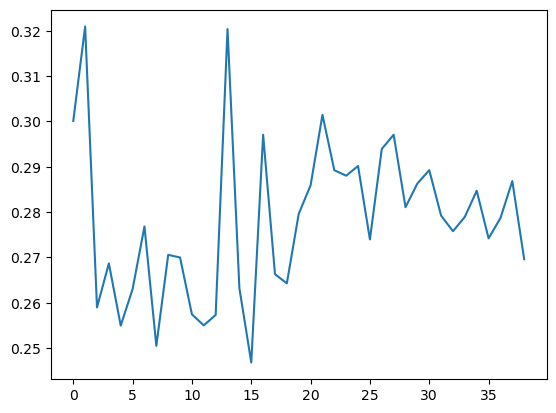

In [145]:
sns.lineplot(
    data=y,  err_style="bars"
)

In [146]:
m = y.index(max(y))
print(m+1)
b = m+1

2


In [147]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=b)

In [148]:
pprint(lda_model.print_topics(num_topics=b, num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.011*"network" + 0.010*"brain" + 0.008*"functional" + 0.007*"connectivity" '
  '+ 0.006*"covid19" + 0.006*"model" + 0.006*"data" + 0.005*"study" + '
  '0.005*"method" + 0.005*"learning"'),
 (1,
  '0.009*"patient" + 0.009*"network" + 0.008*"virtual" + 0.007*"study" + '
  '0.007*"method" + 0.006*"learning" + 0.006*"deep" + 0.005*"data" + '
  '0.005*"reality" + 0.005*"brain"')]


In [149]:
x = lda_model.print_topics(num_topics=b, num_words=10)
x

[(0,
  '0.011*"network" + 0.010*"brain" + 0.008*"functional" + 0.007*"connectivity" + 0.006*"covid19" + 0.006*"model" + 0.006*"data" + 0.005*"study" + 0.005*"method" + 0.005*"learning"'),
 (1,
  '0.009*"patient" + 0.009*"network" + 0.008*"virtual" + 0.007*"study" + 0.007*"method" + 0.006*"learning" + 0.006*"deep" + 0.005*"data" + 0.005*"reality" + 0.005*"brain"')]

In [150]:
len(x)

2

In [151]:
a = []
for i in x:
    b = i[1].split('"')
    c = []
    for j in range(0, len(b)):
        if(j%2!=0):
            c.append(b[j])
    a.append(c)

In [152]:
a

[['network',
  'brain',
  'functional',
  'connectivity',
  'covid19',
  'model',
  'data',
  'study',
  'method',
  'learning'],
 ['patient',
  'network',
  'virtual',
  'study',
  'method',
  'learning',
  'deep',
  'data',
  'reality',
  'brain']]

In [153]:
df = pd.DataFrame(a, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [154]:
df

,0,1,2,3,4,5,6,7,8,9
0,network,brain,functional,connectivity,covid19,model,data,study,method,learning
1,patient,network,virtual,study,method,learning,deep,data,reality,brain
